In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [17]:
from sympy import symbols, Eq, diff, expand, solve

In [18]:
import pandas as pd

In [39]:
df = pd.read_csv('wind_turbine_data_sample.csv')
df

,wind speed,power output
0,5.096144,553.564270
1,6.609746,698.286377
2,7.464809,1240.730957
3,6.646651,834.204285
4,5.611550,461.315887
...,...,...
995,5.136942,304.372986
996,8.891736,2140.145996
997,9.031013,1659.943970
998,8.622097,1999.072021


In [20]:
wind_speed = df['wind speed']

In [21]:
power_output = df['power output']

In [27]:
def func(params, x):
    a, b, c, d = params[0], params[1], params[2], params[3]
    return a*x**3 + b*x**2 + c*x + d

In [28]:
a, b, c, d = symbols('a, b, c, d')

In [29]:
coeffs = (a, b, c, d)

In [32]:
phi = 0

In [33]:
for ws, po in zip(wind_speed, power_output):
    phi += (po - func(coeffs, ws))**2

In [36]:
eq1 = Eq(diff(phi, a), 0)
eq2 = Eq(diff(phi, b), 0)
eq3 = Eq(diff(phi, c), 0)
eq4 = Eq(diff(phi, d), 0)

In [37]:
solutions = solve((eq1, eq2, eq3, eq4), (a, b, c, d))

In [38]:
solutions

{a: -7.59606064982793,
 b: 205.917112180286,
 c: -1334.75406713179,
 d: 2787.95787856771}

In [47]:
x_axis = np.linspace(min(wind_speed), max(wind_speed), 1000)
y_axis = func(tuple(solutions.values()), x_axis)

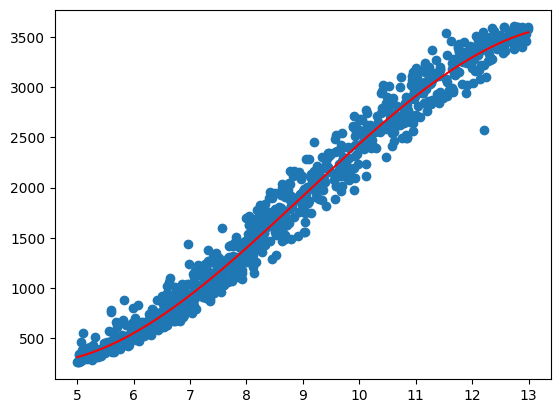

In [52]:
plt.plot(x_axis, y_axis, color = 'red')
plt.scatter(wind_speed, power_output)
plt.show()